In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


         incident_count  nb_fire_hydrant
CASERNE                                 
3                   569            139.0
4                  1568            329.0
5                  1858            189.0
8                   955            240.0
9                  2502            638.0
...                 ...              ...
74                  916            493.0
75                  838            278.0
76                  714            366.0
77                  152            135.0
78                 1037            553.0

[66 rows x 2 columns]


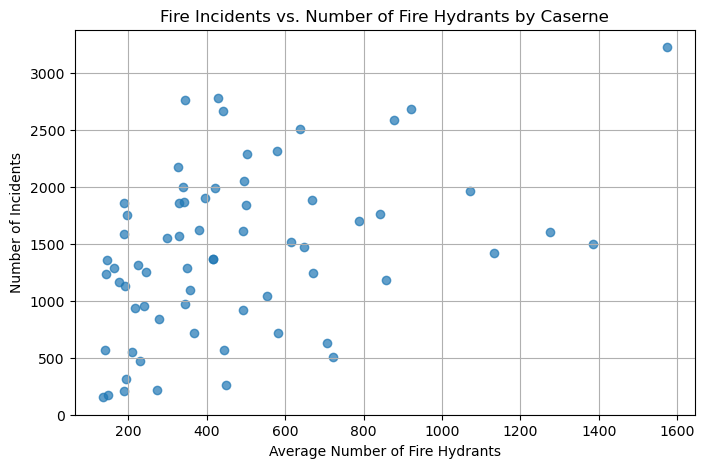

Pearson correlation between nb_fire_hydrant and incident_count: 0.4076560323735391


In [8]:
# Read the CSV data from the string.
df = pd.read_csv('nb_count_fire_hydrant_by_caserne.csv')

# Group by 'CASERNE' and aggregate: count incidents and (if variable) average nb_fire_hydrant.
# (Note: In the provided sample, nb_fire_hydrant is constant, but if you have variation, this step applies.)
grouped = df.groupby("CASERNE").agg({
    "INCIDENT_NBR": "count",          # number of incidents per caserne
    "nb_fire_hydrant": "mean"          # average number of hydrants in that caserne area
}).rename(columns={"INCIDENT_NBR": "incident_count"})

print(grouped)

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
plt.scatter(grouped["nb_fire_hydrant"], grouped["incident_count"], alpha=0.7)
plt.xlabel("Average Number of Fire Hydrants")
plt.ylabel("Number of Incidents")
plt.title("Fire Incidents vs. Number of Fire Hydrants by Caserne")
plt.grid(True)
plt.show()

# Calculate Pearson's correlation coefficient
correlation = grouped["nb_fire_hydrant"].corr(grouped["incident_count"])
print("Pearson correlation between nb_fire_hydrant and incident_count:", correlation)